<a href="https://colab.research.google.com/github/jeffomanga88/Predicting-Insurance-claims/blob/main/Predicting_Insurance_claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("/content/drive/MyDrive/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df=insurance
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.describe

<bound method NDFrame.describe of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


The average age in the dataset is 39 +/- 14 SD (huge age spread), average BMI 30.6 +/- 6.1, and the average charge is 13270.4 +/- 12110 (huge spread).

['age', 'bmi', 'children', 'expenses']
['sex', 'smoker', 'region']


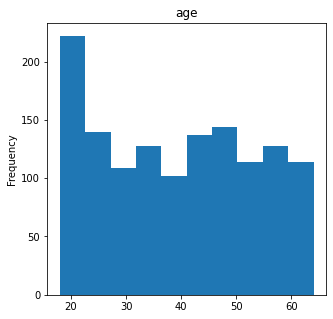

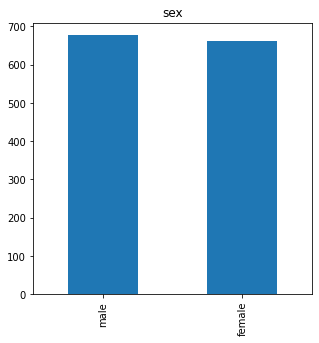

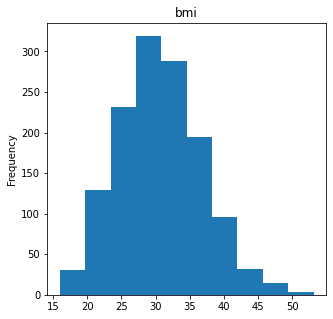

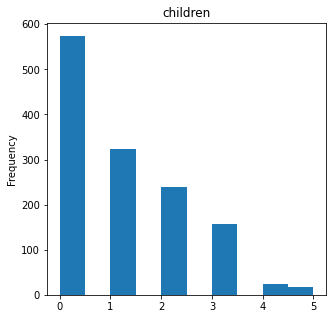

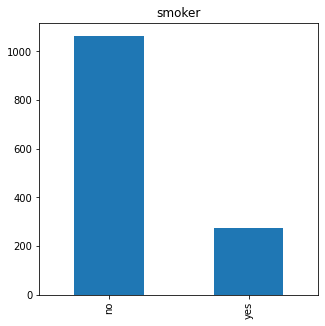

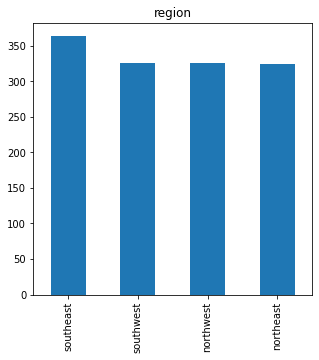

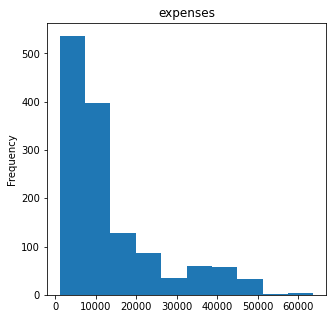

In [ ]:
import sys #system-specific parameters and functions

num_lst = []
cat_lst = []
from pandas.api.types import is_string_dtype, is_numeric_dtype

for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
        num_lst.append(column)
    elif is_string_dtype(df[column]):
        df[column].value_counts().plot(kind = 'bar')
        cat_lst.append(column)
        
print(num_lst)
print(cat_lst)

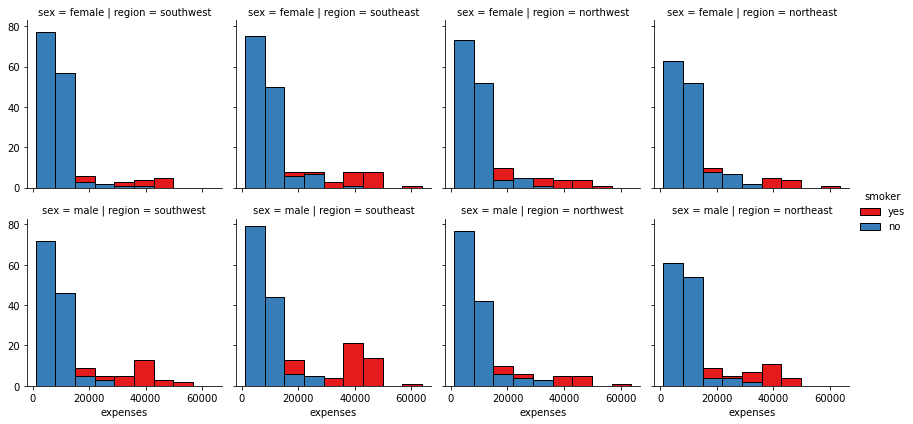

In [ ]:
bins=np.linspace(df.expenses.min(),df.expenses.max(),10)
g =sns.FacetGrid(df,col="region",row="sex",hue="smoker",palette="Set1")
g.map(plt.hist, "expenses" ,bins=bins,ec="k")

g.add_legend()
plt.show()

Now we identify the relationship between BMI and Expenses using a scatterplot

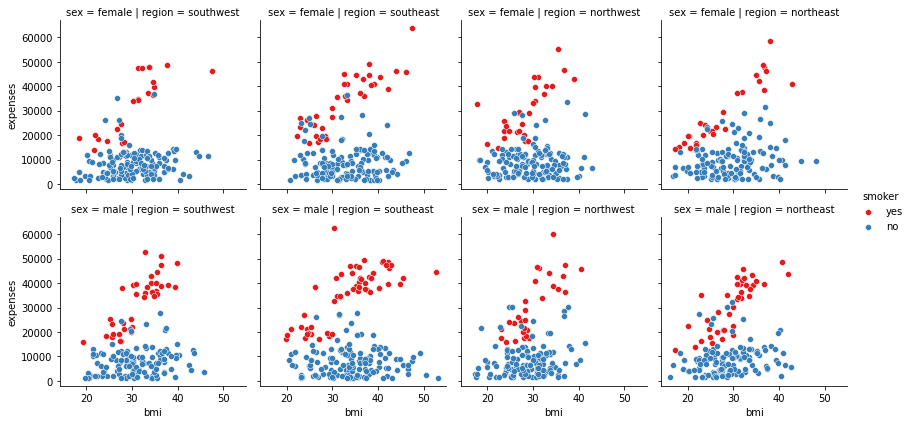

In [ ]:
g =sns.FacetGrid(df,col="region",row="sex",hue="smoker",palette="Set1")
g.map(sns.scatterplot,"bmi" ,"expenses")

g.add_legend()
plt.show()

There is a sort of a linear relationship between smokers' BMI and charges; however, there is no direct relationship between the BMI of non-smokers and charges.

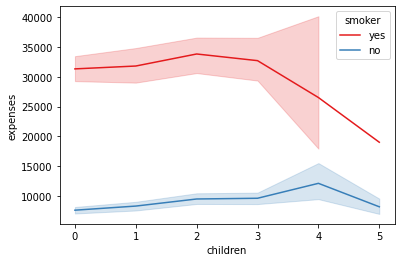

In [ ]:
##Number of children and charges
sns.lineplot(x="children",y="expenses",hue="smoker",data=df,palette="Set1")

In [ ]:
plt.figure(figsize=(15,8))
plt.show()

<Figure size 1080x576 with 0 Axes>

In [ ]:
###Finding the number of unique categories

for col_name in df.columns:
  if df[col_name].dtype=="object":
    unique_cat=len(df[col_name].unique())
    print("Feature'{col_name} has{unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))


Feature'sex has2 unique categories
Feature'smoker has2 unique categories
Feature'region has4 unique categories


In [ ]:
#Finding their frequencies
for name in df.select_dtypes(include=['object']):
  print(name,':')
  print(df[name].value_counts(),'\n')

sex :
male      676
female    662
Name: sex, dtype: int64 

smoker :
no     1064
yes     274
Name: smoker, dtype: int64 

region :
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



We do a correlation test between the variables to ascertain the  collinearity

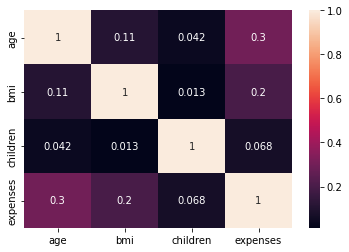

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#It looks good so now we model
X = df.iloc[:, :-1].values #returns all rows and first column
y = df.iloc [:, -1].values #returns all rows and last column

In [ ]:
#Encoding the Independent Variable (Sex and Smoker)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1]) 
X[:, 4] = le.fit_transform(X[:, 4]) 

np.set_printoptions(threshold=sys.maxsize)
print(X[:5,:10])

[[19 0 27.9 0 1 'southwest']
 [18 1 33.8 1 0 'southeast']
 [28 1 33.0 3 0 'southeast']
 [33 1 22.7 0 0 'northwest']
 [32 1 28.9 0 0 'northwest']]


In [ ]:
#Encoding the Independent Variable (Region)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

np.set_printoptions(threshold=sys.maxsize)
print(X[:5,:10])

[[0.0 0.0 0.0 1.0 19 0 27.9 0 1]
 [0.0 0.0 1.0 0.0 18 1 33.8 1 0]
 [0.0 0.0 1.0 0.0 28 1 33.0 3 0]
 [0.0 1.0 0.0 0.0 33 1 22.7 0 0]
 [0.0 1.0 0.0 0.0 32 1 28.9 0 0]]


In [ ]:
#we don't use feature scaling.
#Scaling does not affect your statistical inference in regression models — the estimates are adjusted appropriately and the p-values will be the same.


We split the dataset into training and testing model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)
#test_size - represent the proportion of the dataset to include in the train split.

Training the Simple Linear Regression model on the Training set.

In [ ]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
#Predicting the test result
y_pred = model.predict(test_X)

In [ ]:
#Comparison of predicted and actual Expenses.
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1)[:10])

[[11169.57  9724.53]
 [ 9495.28  8547.69]
 [38192.28 45702.02]
 [16272.57 12950.07]
 [ 6929.96  9644.25]
 [ 3970.27  4500.34]
 [ 1573.76  2198.19]
 [14390.96 11436.74]
 [ 9009.79  7537.16]
 [ 7520.84  5425.02]]


Evaluating the accuracy of the model.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE : ",mean_squared_error(y_pred,test_y))
print("MAE : ",mean_absolute_error(y_pred,test_y))
print("R Score :",r2_score(y_pred,test_y))

MSE :  31823064.32345027
MAE :  3933.3062578580707
R Score : 0.7257510715935881


Conclusion. The Linear Regression does not have the highest accuracy. In the next notebook i am going to check Polynomial regression and compare it with this algorithm.